# Regression Methods

## Processing stock price data in Python

Financial signal processing studies the fluctuation of the value of assets based on historical data of either the same asset or other elements. For this coursework different techniques will be discussed and evaluated. The programming language used is Python 3, which comes with many statistical libraries that will be used for this experiment.

First, some modules will be loaded such as numpy, pandas and scipy. Then the data will be loaded from the file priceData.csv. Since it is labeled, the appropriate column is extracted. Due to the fact that there are indexes whose values are NaN, they are removed alongside their corresponding dates.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import VAR
import copy
import datetime as dt
%matplotlib inline

In [9]:
# Read data from priceData.csv
px = pd.read_csv('priceData.csv')
spx = px['SPX Index']
dates = px['date']

# Remove NaN from the dataset and adjust the dates
spx_indices = np.where(px['SPX Index'].isna() == False)[0]
spx = spx[spx_indices]
dates = dates[spx_indices]

date_axis = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]

### Natural log plot

The following code uses matplotlib to display the log transformed SPX index from the year 1930 to 2017.

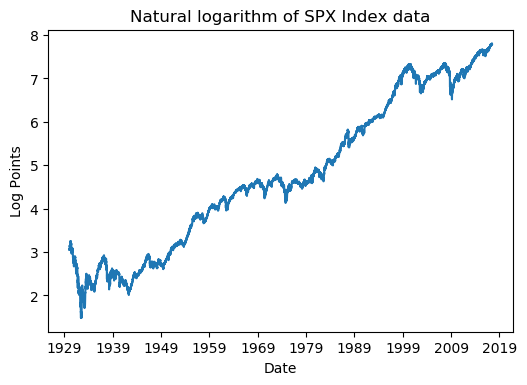

In [24]:
# Perform the natural logarithm transform of the data
logpx = np.log(spx)

plt.figure(dpi=100)
plt.plot(date_axis,logpx)
plt.title('Natural logarithm of SPX Index data')
plt.xlabel('Date')
plt.ylabel('Log Points')
plt.show()

### 252 Days sliding window

The evolution of the first and second order statistics (mean and variance) is computed and displayed. They are calculated using a sliding window of 252 days with a 1 day increment. Due to the exponential behaviour of the stock market, the price volatility increases with the increase in value. However, in terms of percentage it does not. A stock loosing $100 in value was more relevant in 1930 than in 2017 but a loss of 10\% of the value is equaly important. The simple price index captures the exponential behaviour of the trend but fails to provide a realistic view of what the variance is when analyzing the whole century.

On the other hand, the log transform gives a linear representation of the growth of the SPX index and it makes the analysis much easier. The log transform of the SPX Index variance turns it into a stationary times-series where it can be seen when the economic downturns occured.

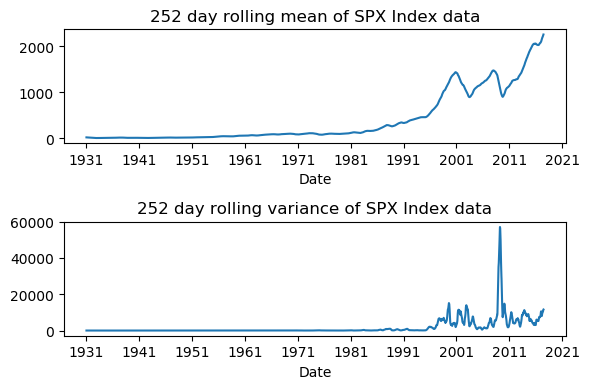

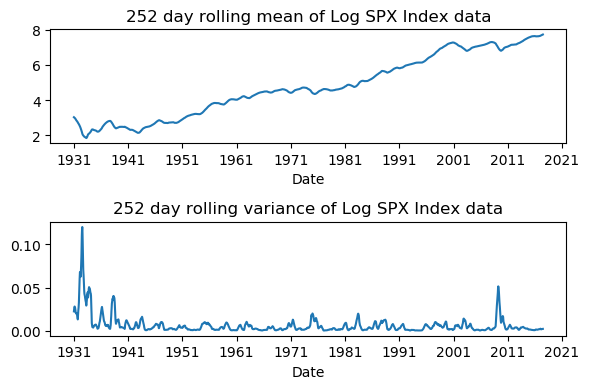

In [3]:
# Sliding mean
plt.figure(dpi=100)
plt.subplot(211)
plt.title('252 day rolling mean of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,spx.rolling(252).mean())

# Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,spx.rolling(252).var())
plt.title('252 day rolling variance of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Log Sliding mean
plt.figure(dpi=100)
plt.subplot(211)
plt.plot(date_axis,logpx.rolling(252).mean())
plt.title('252 day rolling mean of Log SPX Index data')
plt.xlabel('Date')

# Log Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,logpx.rolling(252).var())
plt.title('252 day rolling variance of Log SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Simple and Log return time-series

The return, sliding mean and variance of the return and the log return are displayed. As it can be observed in the figures, the advantage of employing the return instead of the real value of the index lies on the stationarity of the time series. The time series obtained from exercise 1.1.1 are nonstationary which is not desirable for the task of trend extraction. The log return and simple return variance are very similar due to the linear behaviour of the log function for very small values.


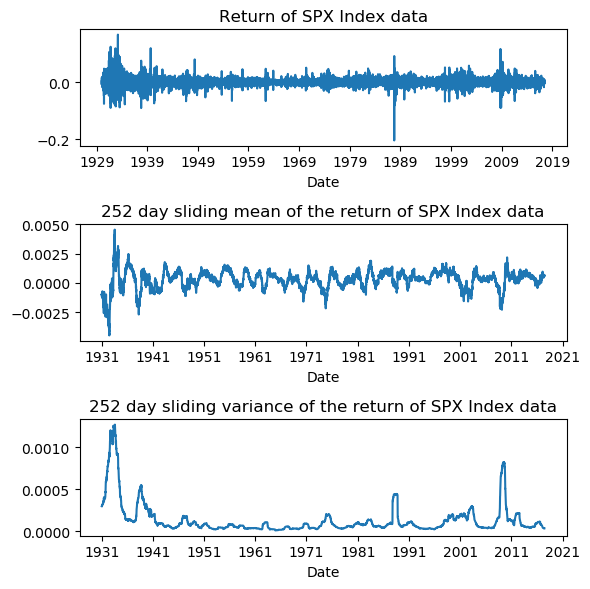

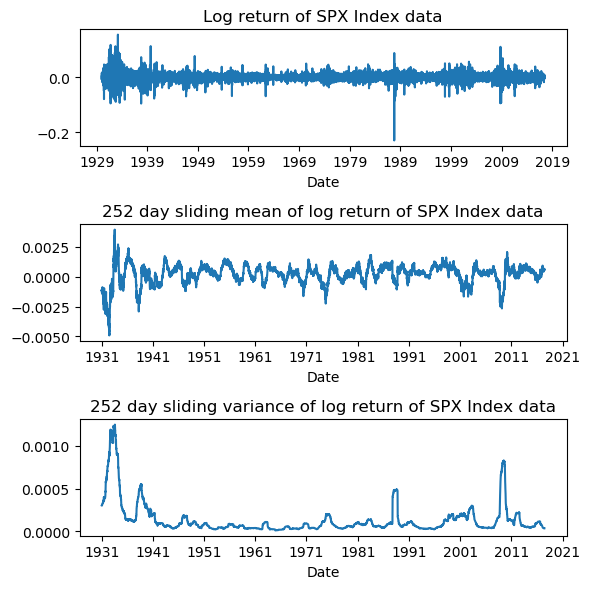

In [4]:

# Simple return
plt.figure(dpi=100, figsize=(6,6))
plt.subplot(311)
simpret = spx.pct_change()
plt.title('Return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret)
plt.tight_layout()

# Sliding mean simple return
plt.subplot(312)
simpret_roll_mean = spx.pct_change().rolling(252).mean()
plt.title('252 day sliding mean of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_mean)
plt.tight_layout()

# Sliding variance simple return
plt.subplot(313)
simpret_roll_var = spx.pct_change().rolling(252).var()
plt.title('252 day sliding variance of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_var)
plt.tight_layout()

# Log return
plt.figure(dpi=100, figsize=(6,6))
plt.subplot(311)
logret = logpx.diff()
plt.plot(date_axis,logret)
plt.title('Log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()

# Sliding mean Log return
plt.subplot(312)
logret_roll_mean = logpx.diff().rolling(252).mean()
plt.plot(date_axis,logret_roll_mean)
plt.title('252 day sliding mean of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()

# Sliding var Log return
plt.subplot(313)
logret_roll_var = logpx.diff().rolling(252).var()
plt.plot(date_axis,logret_roll_var)
plt.title('252 day sliding variance of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Jarque-Bera test

The Jarque-Bera test evaluates how well a gaussian model fits the time series being evaluated. It tests whether the kurtosis and skweness of the model is similar to that of a normal distribution. For its implementation, the scipy library is used. The p-value returned by the algorithm is 0. This means that the null hypothesis is rejected and the time-series does not follow a normal distribution.

In [5]:
# Return the Jarque-Bera test p-value for a time-series x
p_value = stats.jarque_bera(spx)[1]
print(p_value)

0.0


### Simple and logarithmic returns

The listing below illustrates the function that computes the simple and log returns. An asset's value whose value is £1, increases to £2 and then goes back down to £1 is evaluated. When using the simple return function, counter intuitively the purchaser of this asset does not have a return of 0 by the end of the day. However, in the case of the log return this is the case. For this reason the logarithmic return is preferred over the simple return.


In [6]:
price = [1, 2, 1]

# Simple return
R = np.zeros(3)
R[0] = 0            # There is no return on the first day
for t in range(1,3):
    R[t] = (price[t]-price[t-1])/price[t-1]
print('Simple return:', R)
print('Purchaser ends up with:' + str(sum(R)) + ' $')

# Log return
r = np.zeros(3)
r[0] = 0            # There is no return on the first day
for t in range(1,3):
    r[t] = np.log(price[t]/price[t-1])
print('Logarithmic return:', r)
print('Purchaser ends up with:' + str(sum(r)) + ' $')

Simple return: [ 0.   1.  -0.5]
Purchaser ends up with:0.5 $
Logarithmic return: [ 0.          0.69314718 -0.69314718]
Purchaser ends up with:0.0 $


### Preference of simple returns over log returns

Although log returns are easier to manipulate mathematically. There are some reasons because of which simple returns can be prefered over log returns. When the time frame of analysis is large, the assumption of log-normality of the distribution does not hold because the skewness of financial data is negative and that of the model is positive. Furthermore, the returns from different assets are not linearly additive contrary to simple returns.

## ARMA vs. ARIMA Models for Financial Applications

An autoregresive moving average ARMA(p,q) process is a model used to predict stationary data. It consists of an AR part that autoregresses its own past values and an MA part that models the behaviour of the error based on previous error terms. The first intends to explain the momentum and reversion effects from trading markets and it's of order p-AR-lags. The later attempts to model the shock events present in financial data and it's of order q-MA-lags. This process requires the time-series to be stationary.

On the other hand, the autoregressive integrated moving average ARMA(p,d,q) is the same as ARMA but with the addition of a differencing component that makes the time-series stationary. 

### Log closing price of the S&P 500 from 2015 to 2019

The log transform of the S&P 500 time-series is displayed above. It can be observed that it is a nonstationary time-series. Because of this, the task of modeling the time-series is better suited for an ARIMA process than for an ARMA process.

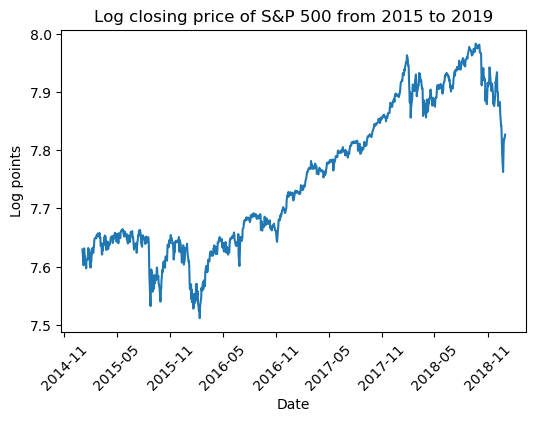

In [58]:
snp = pd.read_csv('snp_500_2015_2019.csv')
dates = snp['Date']
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
# snp.set_index(['Date'], inplace = True)
snp_close = snp['Close'].to_frame().apply(np.log)
plt.figure(dpi=100)
plt.plot(date_axis, snp_close)
plt.xticks(rotation=45)
plt.title('Log closing price of S&P 500 from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('Log points')
plt.show()

### Fit an ARMA(1,0)

An ARMA(1,0) is employed to predict on one day basis the S&P 500 during the period from 2015 to 2019. The resulting MSE can be seen below. 

Prediction MSE:  1.1982109409265327e-08


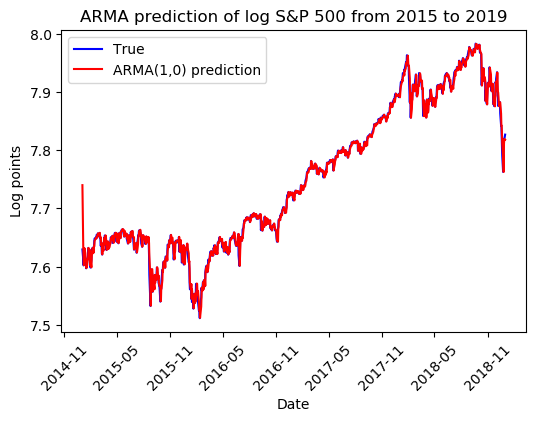

In [116]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,0)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']
plt.figure(dpi=100)
plt.plot(date_axis, snp_close, 'blue')
print('Prediction MSE: ', np.mean((np.array(snp_arma['Prediction']) - np.array(snp_close)))**2)
plt.plot(date_axis, snp_arma['Prediction'], 'red')
plt.xticks(rotation=45)
plt.title('ARMA prediction of log S&P 500 from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('Log points')
plt.legend(['True', 'ARMA(1,0) prediction'])
plt.show()

### Fit an ARIMA(1,1,0)

Prediction MSE:  1.1982109409265327e-08


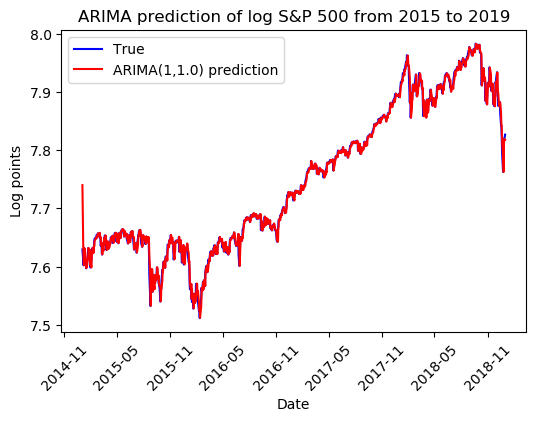

In [118]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,0)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']
plt.figure(dpi=100)
plt.plot(date_axis, snp_close, 'blue')
print('Prediction MSE: ', np.mean((np.array(snp_arma['Prediction']) - np.array(snp_close)))**2)
plt.plot(date_axis, snp_arma['Prediction'], 'red')
plt.xticks(rotation=45)
plt.title('ARIMA prediction of log S&P 500 from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('Log points')
plt.legend(['True', 'ARIMA(1,1.0) prediction'])
plt.show()

## Vector Autoregressive (VAR) Models

Vector autoregression (VAR) is a probabilistic process that models the linear interdependencies of different time-series. It's a generalization of the AR model for more than one variable.
\begin{equation}
x = 2y + 5
\end{equation}

### VAR Matrix form

The vector autoregressive model can be represented in matrix form as

\begin{equation}
\textbf{Y} = \textbf{B}\textbf{Z} + \textbf{U} \\
\end{equation}
where
\begin{equation}
    \textbf{Y} = 
    \begin{pmatrix}
        y_{1,T-1} & y_{1,T-2} & \cdots & y_{1,0} \\
        y_{2,T-1} & y_{2,T-2} & \cdots & y_{2,0} \\
        \vdots        &       \vdots  & \ddots &       \vdots \\
        y_{K,T-1} & y_{K,T-2} & \cdots & y_{K,0} \\ 
    \end{pmatrix}
\end{equation}


\begin{equation}
    \textbf{B} = 
    \begin{pmatrix}
        c_{1}      &      a_{1,1}^{1} & a_{1,2}^{1} & \cdots & a_{1,K}^{1} & a_{1,1}^{2} \cdots & a_{1,K}^{P} \\
        c_{2}      &      a_{2,1}^{1} & a_{2,2}^{1} & \cdots & a_{2,K}^{1} & a_{2,1}^{2} \cdots & a_{2,K}^{P} \\
        \vdots      &      \vdots        &       \vdots  & \ddots &       \vdots  &  \vdots \quad  \ddots & \vdots \\
        c_{K}      &      a_{K,1}^{1} & a_{K,2}^{1} & \cdots & a_{K,K}^{1} & a_{K,1}^{2} \cdots & a_{K,K}^{P} \\ 
    \end{pmatrix}
\end{equation}

\begin{equation}
    \textbf{Z} = 
    \begin{pmatrix}
            1             &        1      & \cdots &     1     \\
        y_{1,t-1}^{1} & y_{1,t-2}^{1} & \cdots & y_{1,t-p}^{1} \\
        y_{2,t-1}^{1} & y_{2,t-2}^{1} & \cdots & y_{2,t-p}^{1} \\
        \vdots        &       \vdots  & \ddots &       \vdots \\
        y_{K,t-1}^{1} & y_{K,t-2}^{1} & \cdots & y_{K,t-p}^{1} \\
        y_{1,t-1}^{2} & y_{1,t-2}^{2} & \cdots & y_{1,t-p}^{2} \\
        \vdots        &       \vdots  & \ddots &       \vdots \\
        y_{K,t-1}^{p} & y_{K,t-2}^{p} & \cdots & y_{K,t-p}^{p} \\ 
    \end{pmatrix}
\end{equation}

\begin{equation}
    \textbf{U} = 
    \begin{pmatrix}
        e_{1,T-1} & e_{1,T-2} & \cdots & e_{1,0} \\
        e_{2,T-1} & e_{2,T-2} & \cdots & e_{2,0} \\
        \vdots    &   \vdots  & \ddots &   \vdots \\
        e_{K,T-1} & e_{K,T-2} & \cdots & e_{K,0} \\ 
    \end{pmatrix}
\end{equation}



### Optimal set of coefficients for the matrix B

In order to minimize the error of the function above, an LSE estimator is used for the model. The cost function is given by:

\begin{equation}
J(\textbf{B}) = (\textbf{Y}-\textbf{B}\textbf{Z})^{T}(\textbf{Y}-\textbf{B}\textbf{Z})
\end{equation}

when expanded, it turns into

\begin{equation}
J(\textbf{B}) = \textbf{Y}\textbf{Y}^{T} - 2\textbf{Y}^{T}\textbf{B}\textbf{Z} + \textbf{Z}^{T}\textbf{B}^{T}\textbf{B}\textbf{Z}
\end{equation}

The aim is to minimize the cost function:

\begin{equation}
\frac{J(\textbf{B})}{d\textbf{B}} = 0
\end{equation}

This results in:

\begin{equation}
-2\textbf{Y}\textbf{Z}^{T} + \textbf{B}_{opt}(\textbf{Z}\textbf{Z}^{T}+\textbf{Z}\textbf{Z}^{T}) = 0 \\
-2\textbf{Y}\textbf{Z}^{T} + 2\textbf{B}_{opt}\textbf{Z}\textbf{Z}^{T} = 0
\end{equation}

Finally, the optimal parameters are given by:

\begin{equation}
\textbf{B}_{opt} = \textbf{Y}\textbf{Z}^{T}(\textbf{Z}\textbf{Z}^{T})^{-1}
\end{equation}



### Stability of a VAR(1) process

A VAR(1) process is given by the following equation

\begin{equation}
\textbf{y}_{t} = \textbf{A}\textbf{y}_{t-1} + \textbf{e}_{t}
\end{equation}

For the system to be stable the eigenvalues of the matrix \textbf{A} must be smaller than one in absolute value. This is proven by taking the Z-transform:

\begin{equation}
Y(z) = \textbf{A}Y(z)z^{-1} + E(z)\\
Y(z)(\textbf{I}-\textbf{A}z^{-1}) = E(z)\\
H(z) = \frac{\textbf{I}}{\textbf{I}-\textbf{A}z^{-1}}\\
\textbf{A} = \textbf{Q}\textbf{D}\textbf{Q}^{-1} \Rightarrow H(z) = \frac{\textbf{I}}{\textbf{I} - \textbf{Q}\textbf{D}\textbf{Q}^{-1}z^{-1}}\\
\text{where } \textbf{A} \text{ has been diagonalized.}\\
\text{For the system to be stable, there must be no poles. This happens when }\\
|\lambda| < 1
\end{equation}




### Evaluation of selected stocks from S&P 500

5 stocks from the S&P 500 are selected and evaluated. In order to detrend the time-series and turn them stationary, an MA(66) is applied.

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


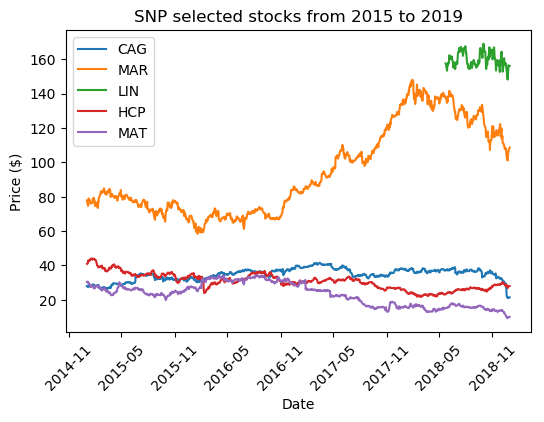

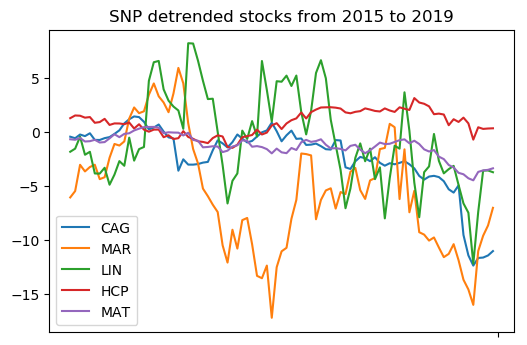

In [275]:
df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
dates = df['Date']
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
df = df.set_index('Date')
info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0] ,inplace = True)
tickers = ['CAG', 'MAR' ,'LIN' ,'HCP' ,'MAT' ]
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

plt.figure(dpi=100)
plt.plot(date_axis,stocks)
plt.title('SNP selected stocks from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(tickers)
plt.show()

plt.figure(dpi=100)
start = date[0]
end = date[len(date)-1]
plt.plot(stocks_detrended)
plt.xticks('')
plt.title('SNP detrended stocks from 2015 to 2019')
plt.legend(tickers)
plt.show()


The eigenvalues of the regression matrix A are displayed below. It can be seen that all the eigenvalues of A are positive. However, because eigenvalue 3 is larger than 1, the system is unstable. When selecting a portfolio, it is of interest to find stocks that are very highly correlated (positively or negatively) or very independent. This does not seem to be the case for this portfolio, and, therefore, it is not a good investment option.

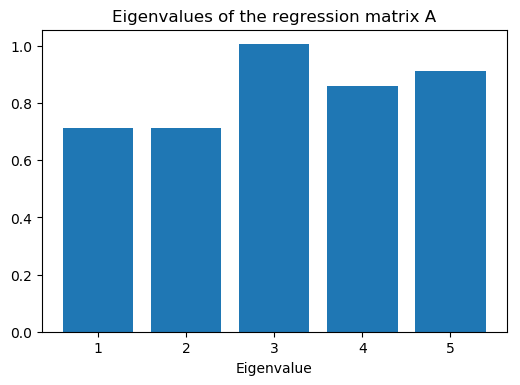

The corelation between CAG and MAR is 1686.787204130599
The corelation between CAG and LIN is 687.6361723323872
The corelation between CAG and HCP is -188.83792217013934
The corelation between CAG and MAT is 502.5160407479209
The corelation between MAR and CAG is 1686.787204130599
The corelation between MAR and LIN is 889.3412167334361
The corelation between MAR and HCP is -416.8463906632506
The corelation between MAR and MAT is 1012.8199481986053
The corelation between LIN and CAG is 687.6361723323872
The corelation between LIN and MAR is 889.3412167334361
The corelation between LIN and HCP is -148.31280074884597
The corelation between LIN and MAT is 269.65145841937255
The corelation between HCP and CAG is -188.83792217013934
The corelation between HCP and MAR is -416.8463906632506
The corelation between HCP and LIN is -148.31280074884597
The corelation between HCP and MAT is -103.31475622438643
The corelation between MAT and CAG is 502.5160407479209
The corelation between MAT and MAR

In [276]:

plt.figure(dpi=100)
plt.bar([1,2,3,4,5],eigA)
plt.title('Eigenvalues of the regression matrix A')
plt.xlabel('Eigenvalue')
plt.show()

for stock1 in tickers:
    for stock2 in tickers:
        if (stock2 != stock1):
            print('The corelation between ' + stock1 + ' and ' + stock2 + ' is ' + str(np.correlate(stocks_detrended[stock1], stocks_detrended[stock2])[0]))


### Evaluation of sectors in S&P 500

In this exercise the stocks are grouped by sectors and then analyzed. An MA(66) is applied to detrend the time-series and the result is then displayed. Investing in a sector rather than in individual diversified stocks conveys a greater risk. If an external event causes an bad effect on that industry, all the stocks will plummet and viceversa. However, it will minimize the within-sector risk since they will all follow a similar trend if they are correlated. Many times, companies within the same sector are competitors. If one company grows it could cause another company to shrink. For this reason, an appropriate stock selection within the same sector can lead to the minimization of risk.
Grouping the stocks by sector can provide meaningful information about how much a stock can be valued if a certain market level is reached.

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


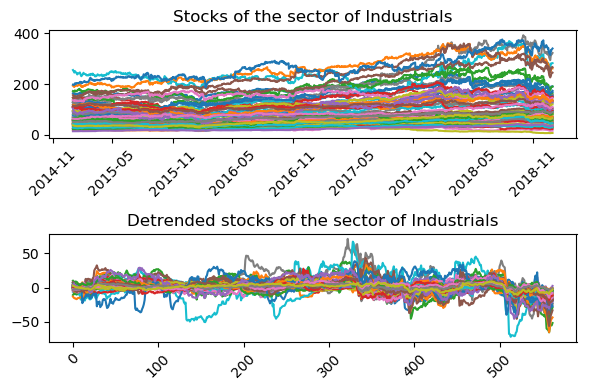

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


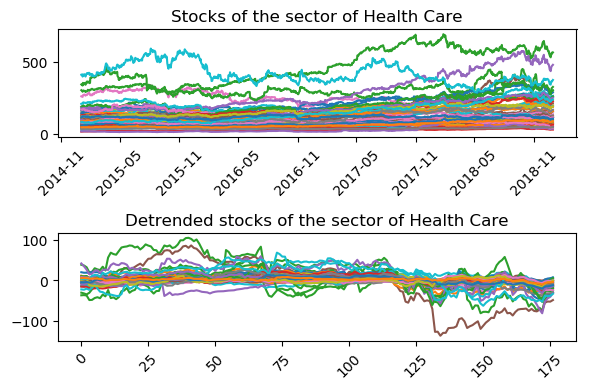

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


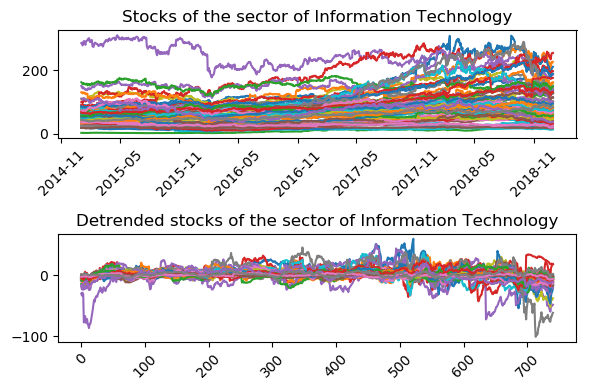

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


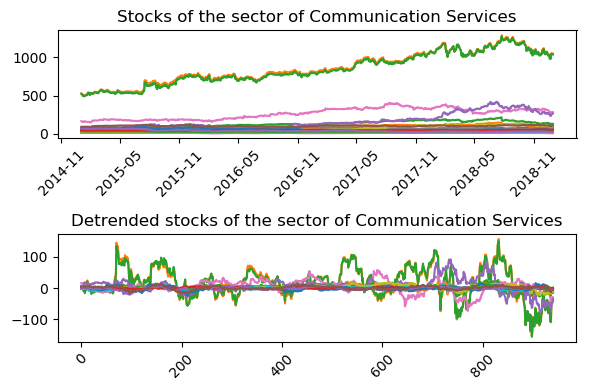

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


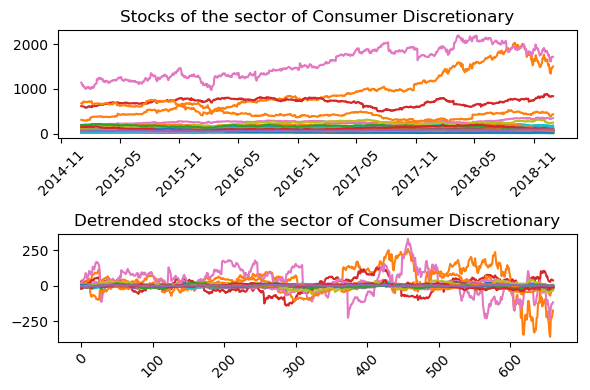

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


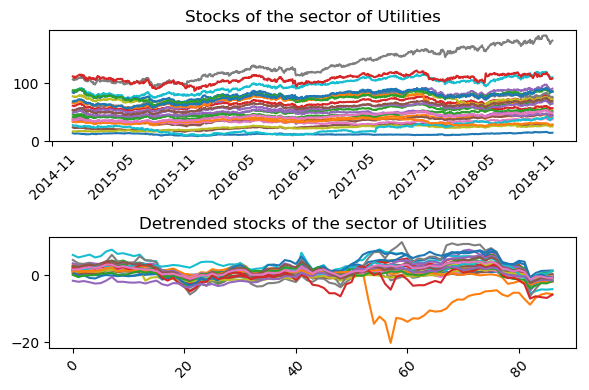

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


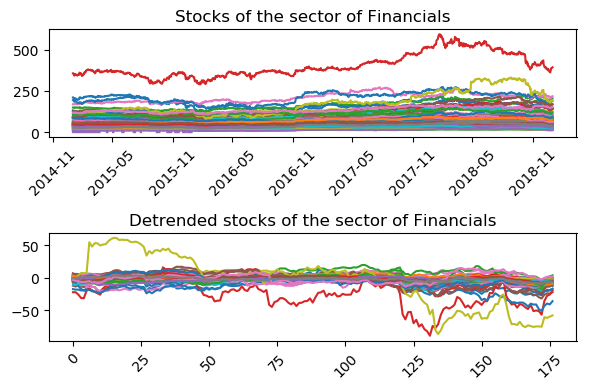

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


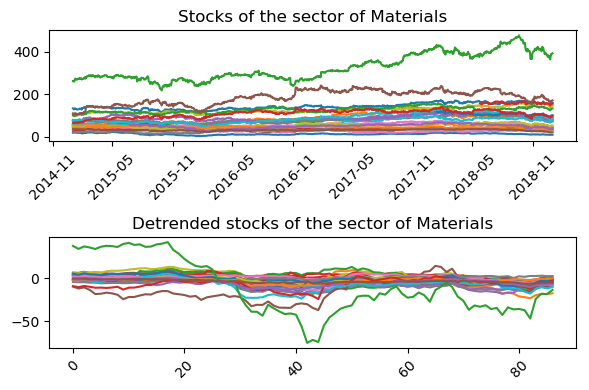

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


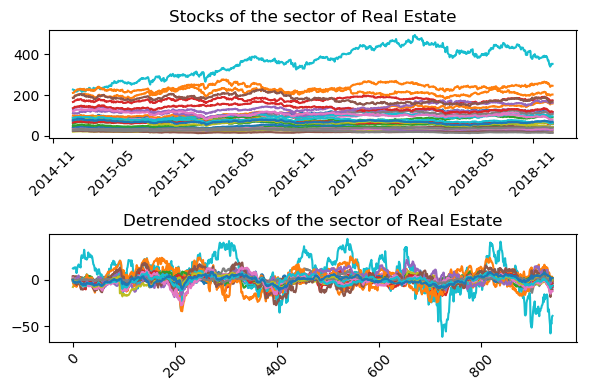

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


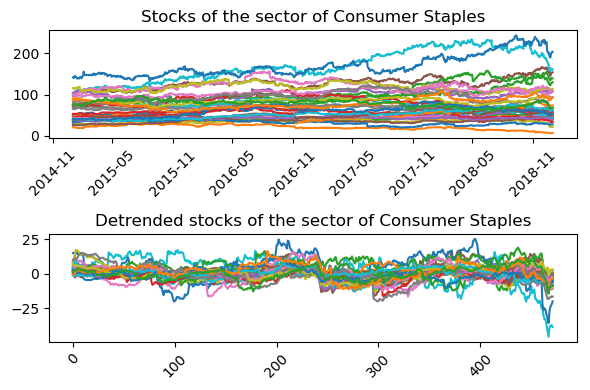

/home/alex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


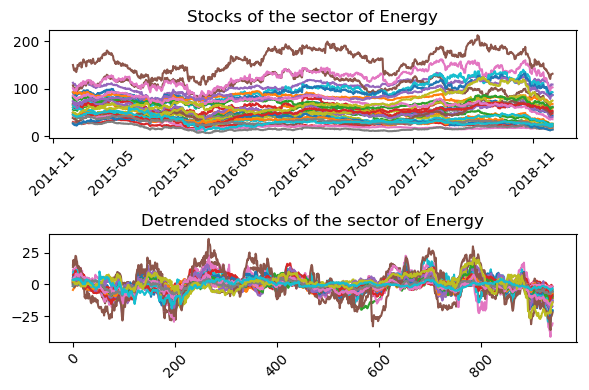

In [272]:
for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()
    stocks = df[tickers]
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    model = VAR(stocks_detrended)
    results = model.fit(1)
    A = results.params[1:].values
    print()
    eigA, _ = np.linalg.eig(A)

    plt.figure(dpi=100)
    plt.subplot(211)
    plt.plot(date_axis,stocks)
    plt.title('Stocks of the sector of ' + str(sector))
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.subplot(212)
    plt.plot(np.array(stocks_detrended))
    plt.title('Detrended stocks of the sector of ' + str(sector))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
